In [1]:
from src.yahoo_finance import *
import matplotlib.pyplot as plt
%matplotlib widget
%load_ext autoreload
%autoreload 2

/home/raghuram/repos/portfolio-constructor/src/yahoo_finance.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def build_capm(asset, market, risk_free=pd.Series([]), plot=False):


## Capital Asset Pricing Model (CAPM)
- CAPM used here is with with risk free rate adjustment.
- ^TNX/US 10-year Treasury Bill assumed to be risk free rate.
- Model formulation:
    $$r_{asset} = \alpha + \beta \cdot (r_{Market} - r_{RiskFree}) + \epsilon_{t}$$
- Beta is defined as the ratio of covariance of asset and market returns to the variance of market returns.
    $$\beta = \frac{Covariance(r_{asset}, r_{market})}{Variance(r_{market})}$$
- Beta helps investors understand whether a stock moves in the same direction as the market and by how much relative to the market.
- The market, usually the S&P500 is assumed to have a beta of 1.
- High beta (AAPL/Apple Inc) is compared to Low beta (^IRX/US 3-month Treasury Bill).

In [2]:
tickers = 'AAPL ^GSPC ^TNX'
df = get_df(tickers)
df = monthly_returns(df)

[*********************100%***********************]  3 of 3 completed


Alpha =  0.017590432081700656
Beta =  1.0824508409339368


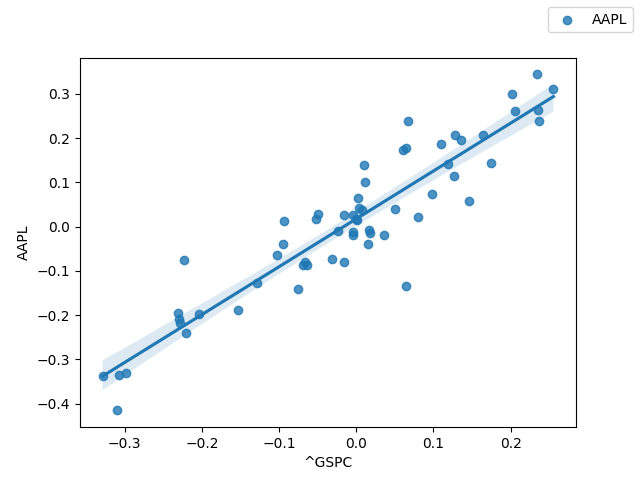

In [3]:
fig = plt.figure()
results = build_capm(df['AAPL'], df['^GSPC'], risk_free=df['^TNX'], plot=True)
fig.legend(labels=['AAPL'])
print("Alpha = ", results.params[0])
print("Beta = ", results.params[1])

In [4]:
tickers = '^IRX ^GSPC ^TNX'
df = get_df(tickers)
df = monthly_returns(df)

[*********************100%***********************]  3 of 3 completed


Alpha =  -0.011773721305963191
Beta =  0.013268294485896892


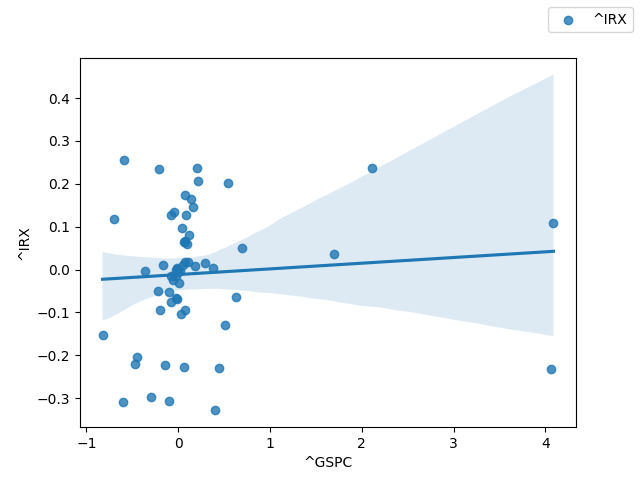

In [5]:
fig = plt.figure()
results = build_capm(df['^IRX'], df['^GSPC'], risk_free=df['^TNX'], plot=True)
fig.legend(labels=['^IRX'])
print("Alpha = ", results.params[0])
print("Beta = ", results.params[1])